# Telco Customer Churn Project

## Objectives: to determine what factors drive customer churn


In [32]:
#initial imports

import acquire
import prepare
import explore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import warnings
import scipy

#import sklearn methods
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score

#turns off any warnings in function outputs
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Preparation

## Decisions made in preparation:

1. To drop any duplicate columns
2. To drop the columns that contain duplicate information
4. Creating dummy columns of string variables for modeling purposes

In [33]:
df = acquire.get_telco_data()

In [34]:
train, validate, test = prepare.prep_telco_data(df)

/Users/Scott/codeup-data-science/classification-exercises/classification_project/prepare.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df.total_charges.astype(float)
/Users/Scott/codeup-data-science/classification-exercises/classification_project/prepare.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
/Users/Scott/codeup-data-science/classification-exercises/classification_project/prepare.py:35: SettingWithCopyW

### The test set is 20% of the original df, 
### the validate set is 24%,
### the train set is 56% of the original df

## Exploratory Data Analysis

Categorical feature (integer-type) "correlations" (Pearson R) to churn_encoded:


churn_encoded                            1.000000
contract_type_month_to_month             0.406632
internet_service_type_Fiber optic        0.321678
payment_type_Electronic check            0.292306
paperless_billing_encoded                0.190075
senior_citizen                           0.159932
multiple_lines_Yes                       0.053031
streaming_movies_Yes                     0.051348
streaming_tv_Yes                         0.038849
phone_service_encoded                    0.015906
gender_encoded                          -0.000008
multiple_lines_No phone service         -0.015906
device_protection_Yes                   -0.060108
online_backup_Yes                       -0.068519
payment_type_Mailed check               -0.090324
payment_type_Credit card (automatic)    -0.127314
partner_encoded                         -0.143203
tech_support_Yes                        -0.159305
dependents_encoded                      -0.163579
online_security_Yes                     -0.180834


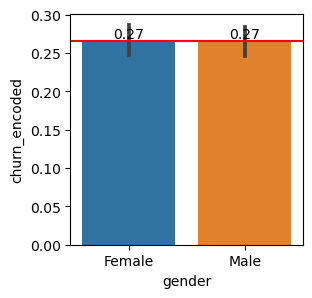

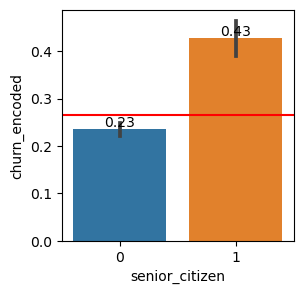

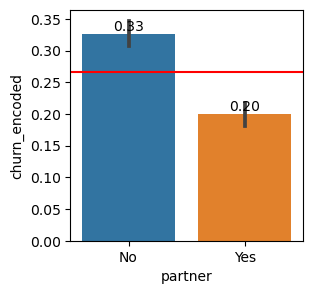

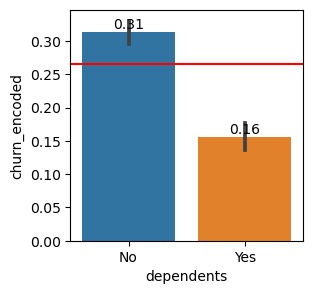

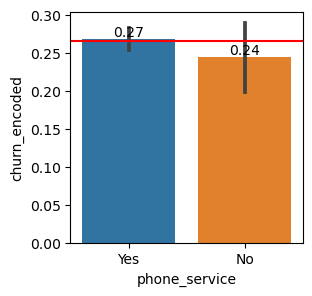

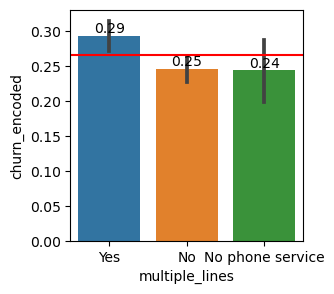

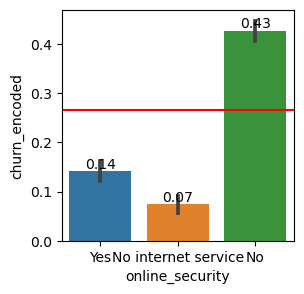

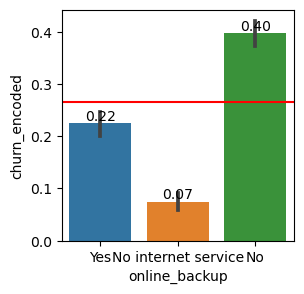

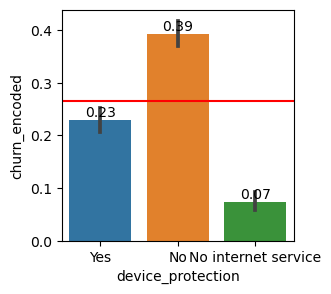

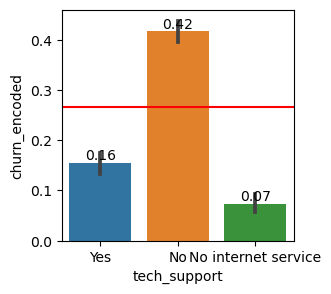

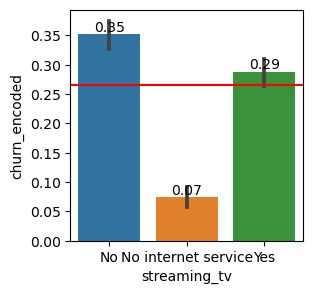

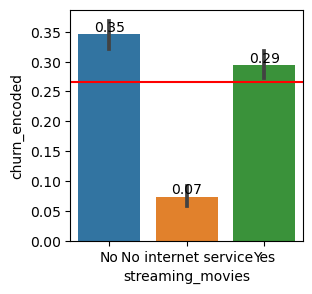

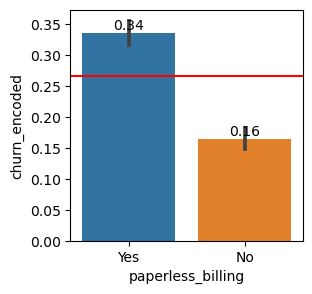

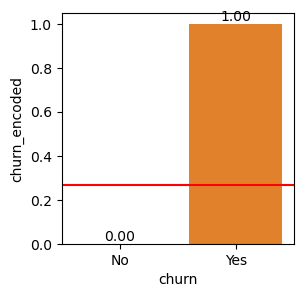

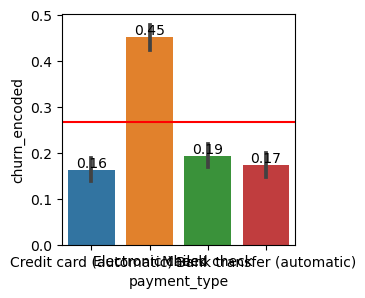

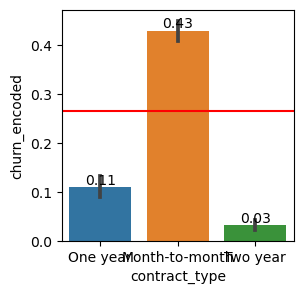

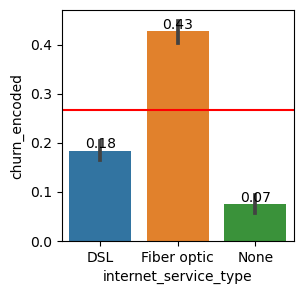

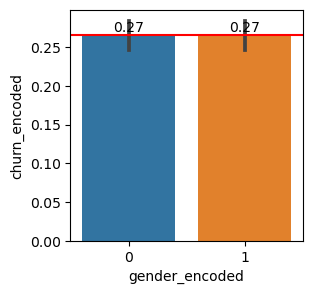

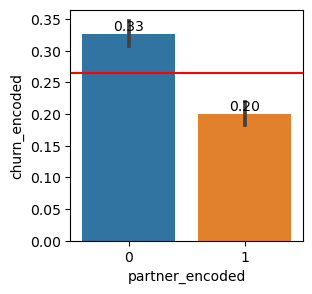

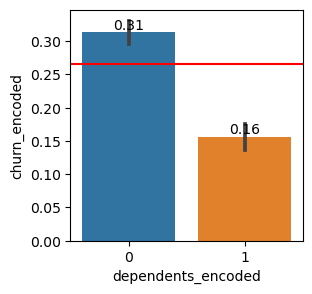

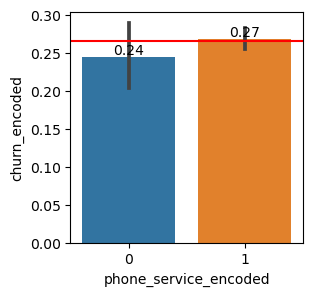

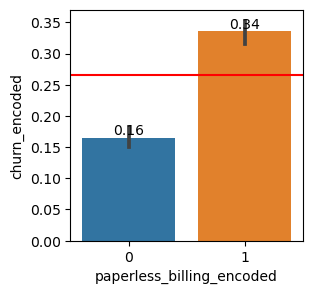

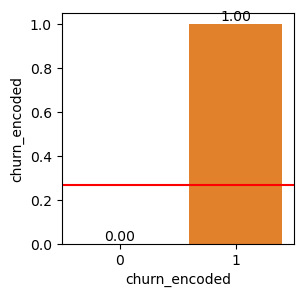

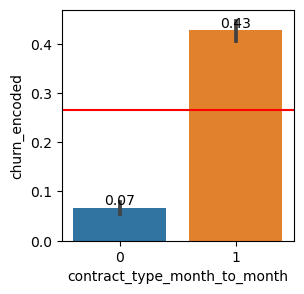

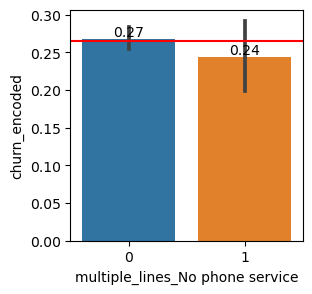

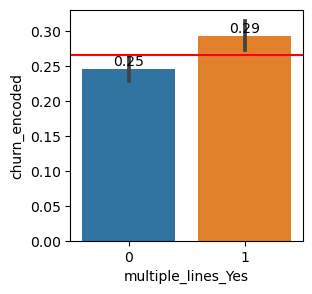

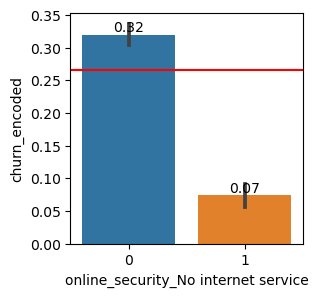

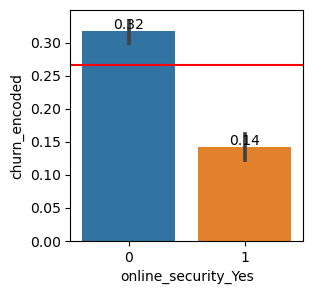

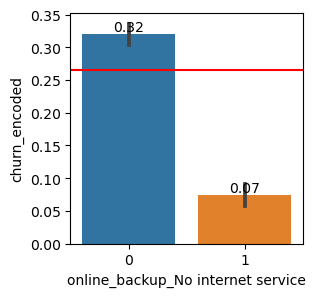

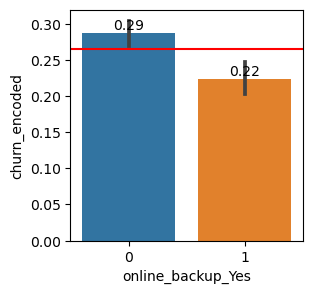

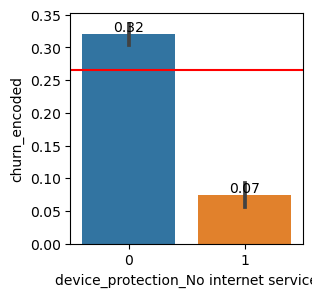

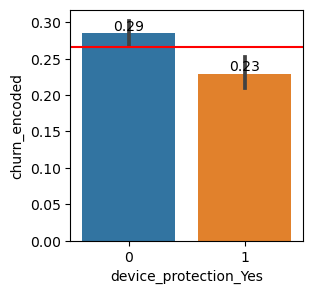

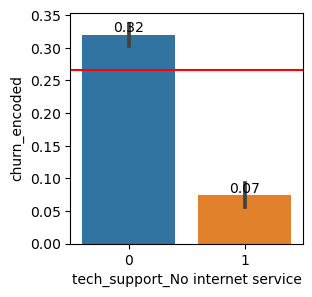

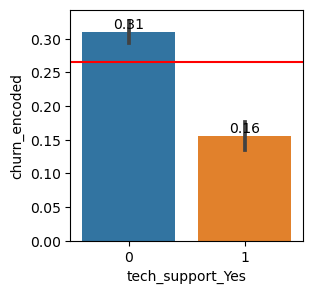

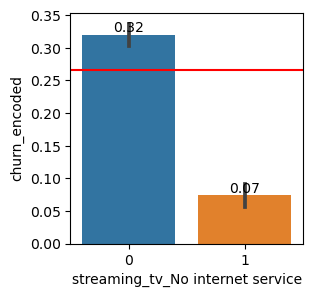

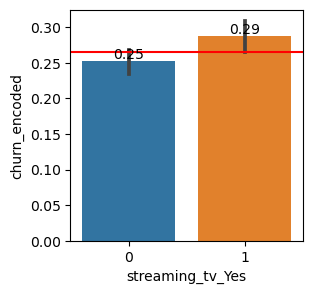

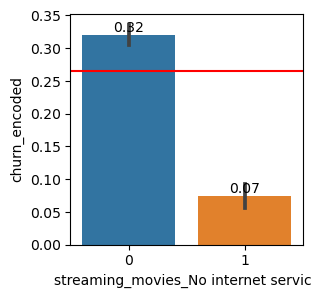

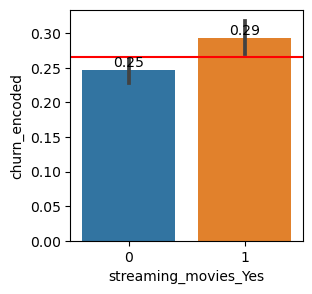

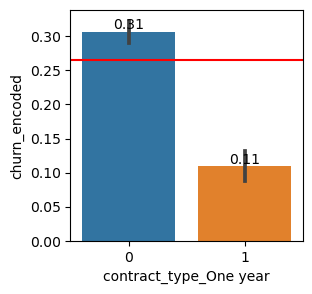

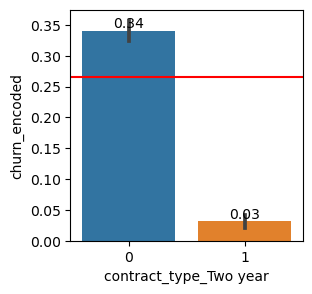

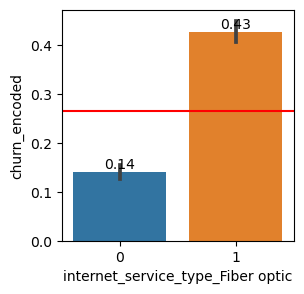

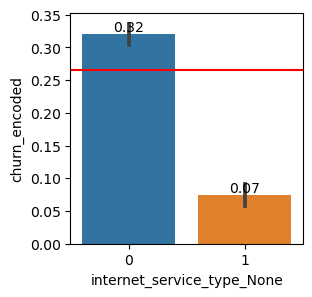

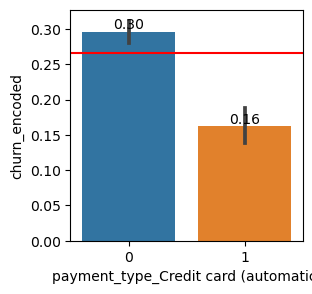

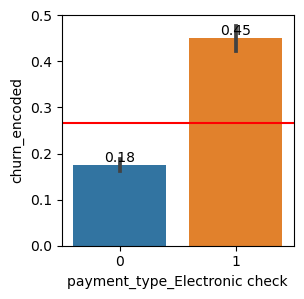

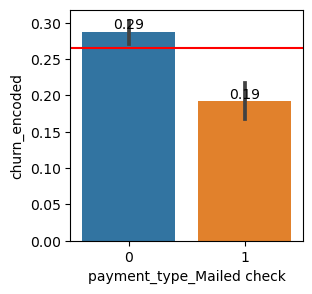

/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',


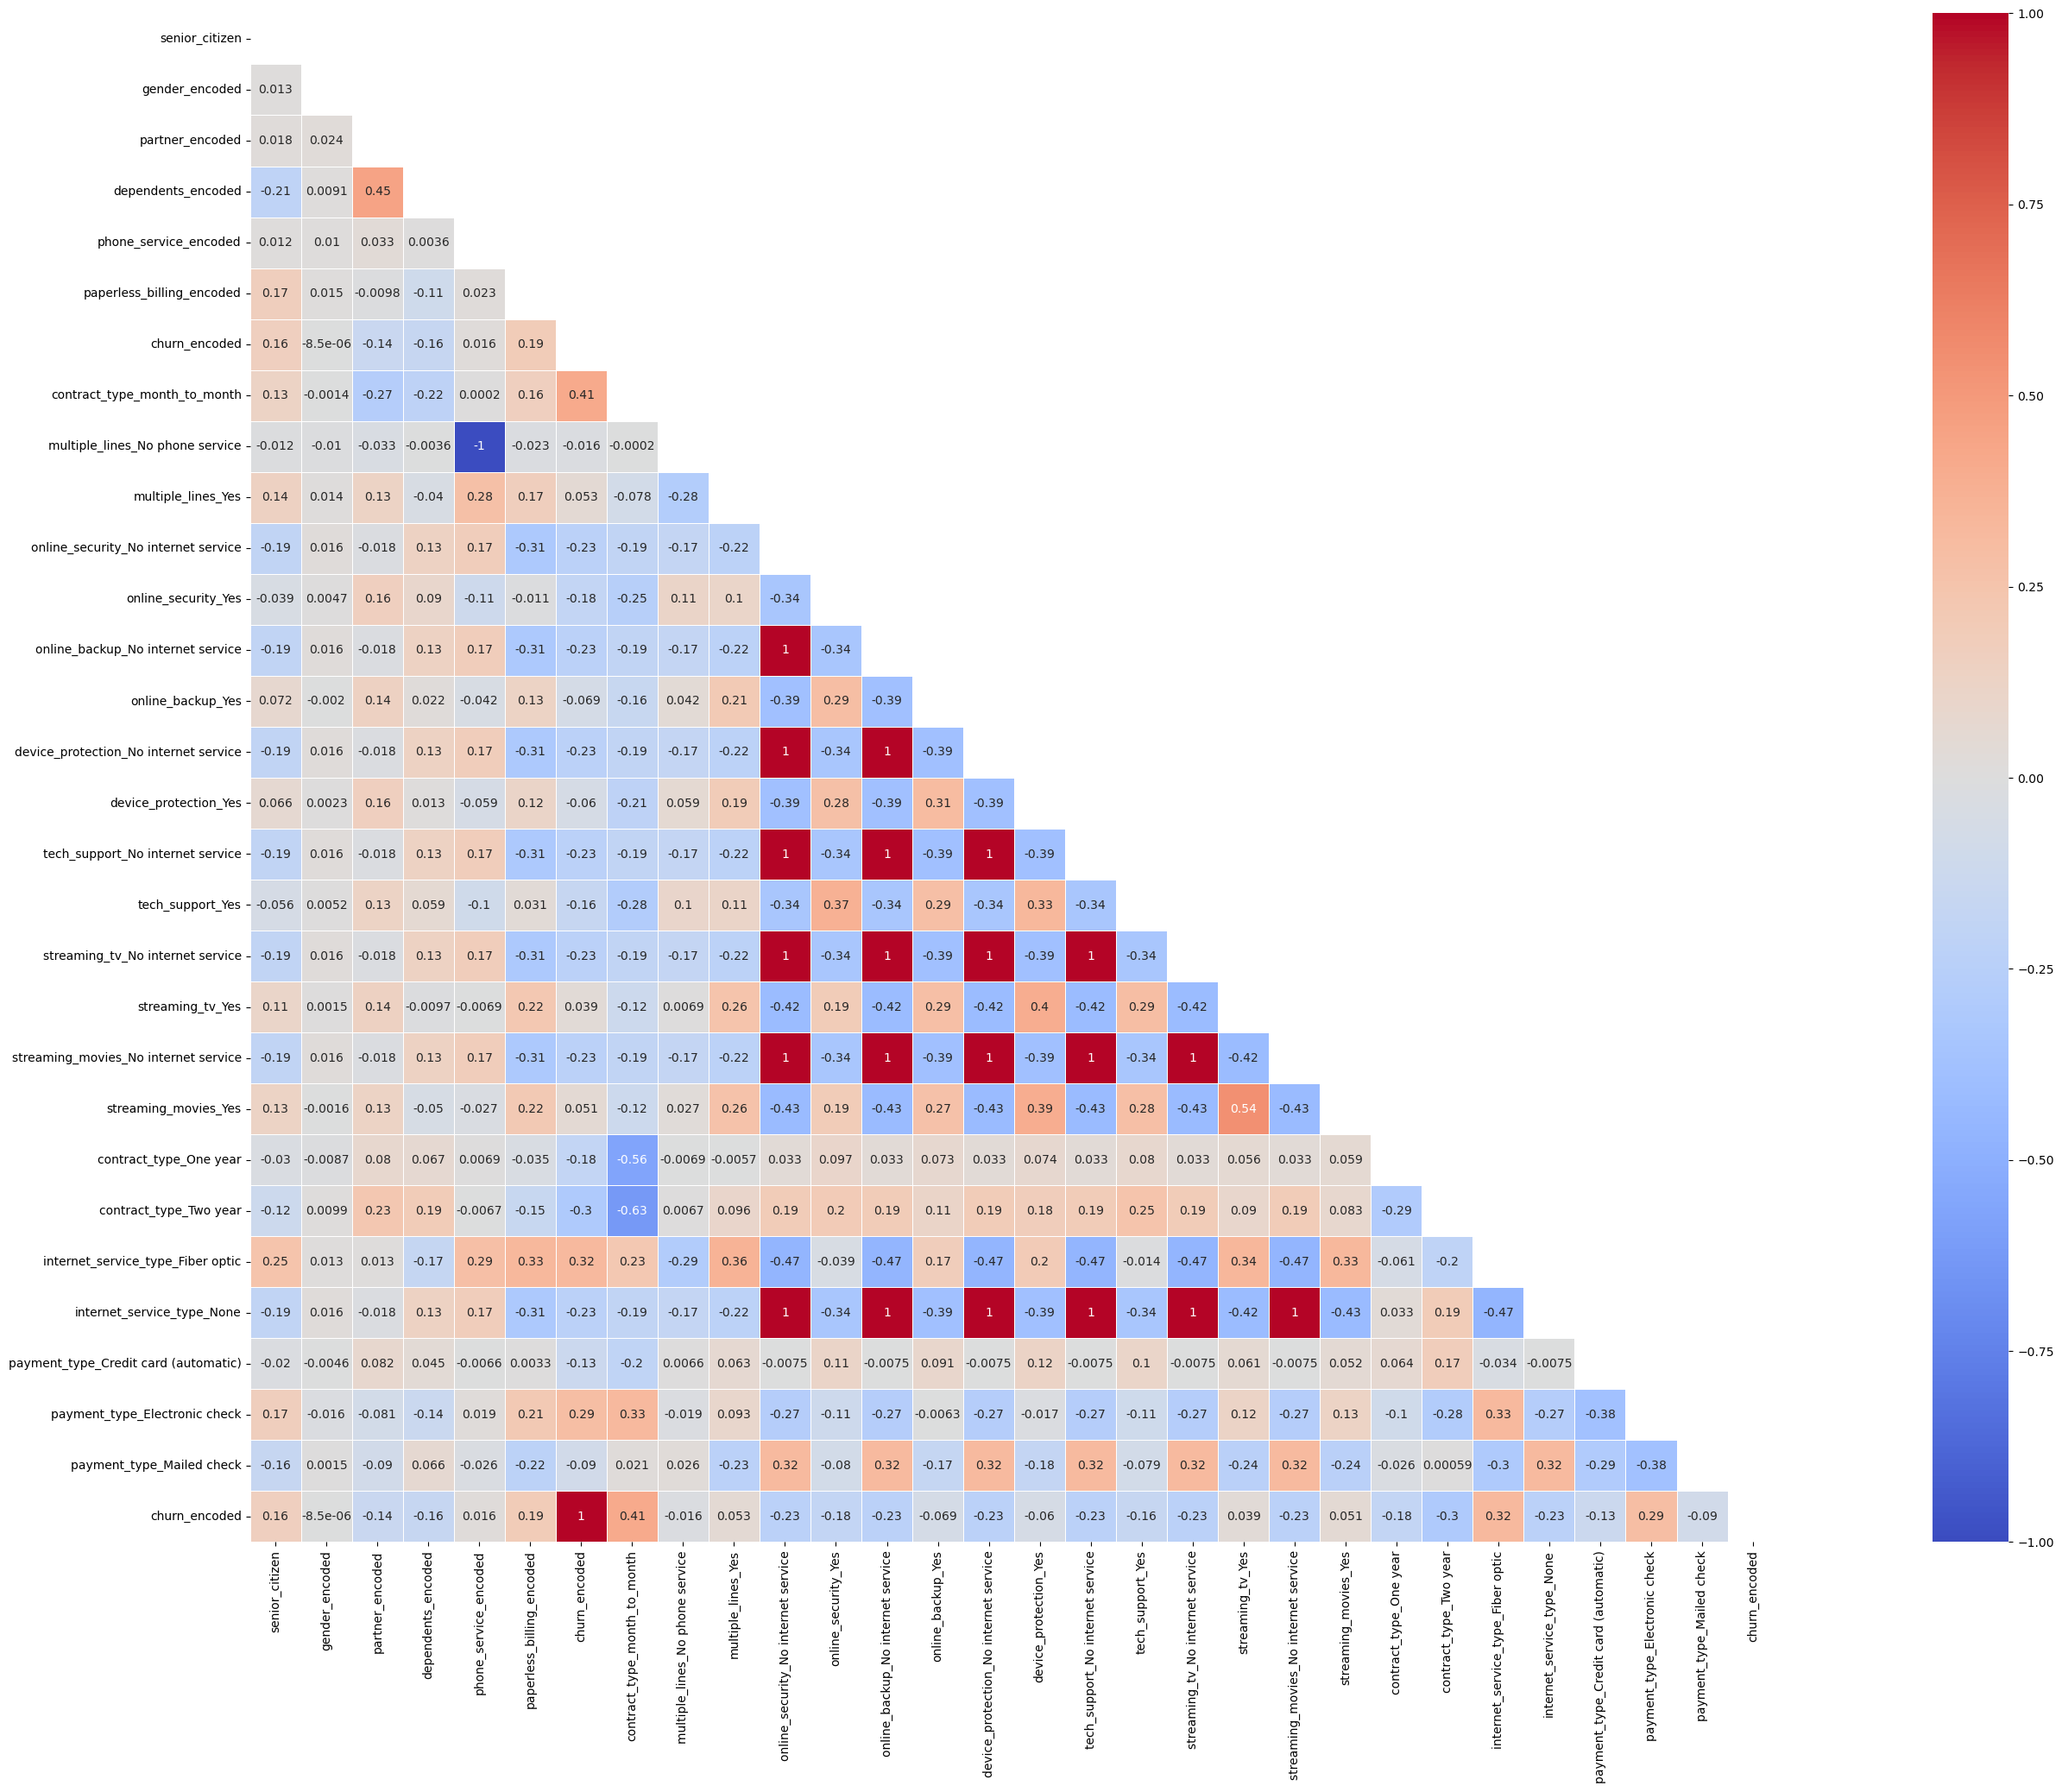

In [35]:
explore.explore_bivariate_cat_to_cat_target(train, 'churn_encoded')

## Possible relationships that drive customer churn: fiber optic internet, electronic check payments, two-year contracts, and month-to-month contracts

## "Do customers who use fiber optic services tend to churn more often?"

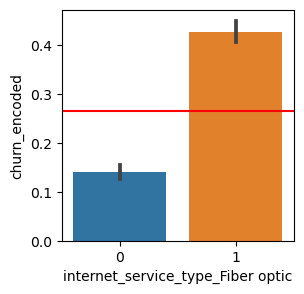

In [36]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='internet_service_type_Fiber optic', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')

## "Do customers who pay with electronic checks tend to churn more often?"

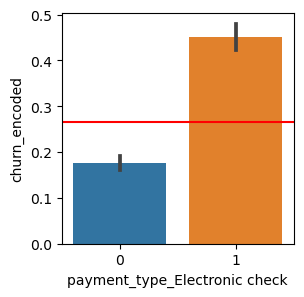

In [37]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='payment_type_Electronic check', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')

## "Do customers with a two-year contract tend to churn more often?"

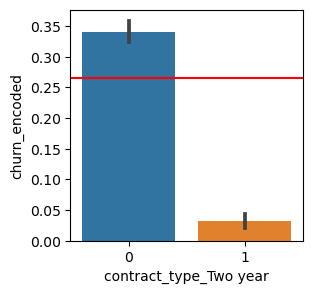

In [38]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='contract_type_Two year', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')

## "Do customers with a month-to-month contract tend to churn more often?"

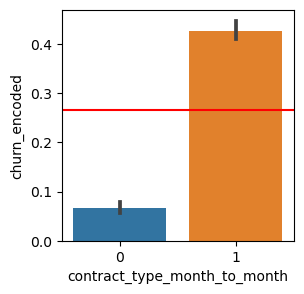

In [39]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='contract_type_month_to_month', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')

## Conduct chi2 statistical testing to determine if these possible relationships are meaningful

In [40]:
# stores selected features in a list
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

alpha = .05

# Loops through the list of selected feature columns, runs a chi2 stats test, and prints the results including 
# the relationship of the p-value to the alpha
for ele in stats_test_list:
    ctab = pd.crosstab(train.churn_encoded, train[ele])
    chi, p, _, _ = scipy.stats.chi2_contingency(ctab)
    print(f'''
Results for {ele}:
    
R value equals {round(chi, 3)}
P-value equals {p}
    ''')
    
    if p < alpha:
        print(f'The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between {ele} and churn\n\n ----------------\n')
    else:
        print(f'The p value is higher than alpha. We cannot reject the null hypothesis. There is no meaningful relationship between {ele} and churn\n\n ----------------\n')
        


Results for internet_service_type_Fiber optic:
    
R value equals 405.921
P-value equals 2.831419548361709e-90
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between internet_service_type_Fiber optic and churn

 ----------------


Results for payment_type_Electronic check:
    
R value equals 334.98
P-value equals 7.910587922260644e-75
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between payment_type_Electronic check and churn

 ----------------


Results for contract_type_Two year:
    
R value equals 354.286
P-value equals 4.941935969249593e-79
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between contract_type_Two year and churn

 ----------------


Results for contract_type_month_to_month:
    
R value equals 649.133
P-value equals 3.4484593947893894e-143
    
The p value is lower than alpha. We c

## The features: 
## 'internet_service_type_Fiber optic', 
## 'payment_type_Electronic check', 
## 'contract_type_Two year', and 
## 'contract_type_month_to_month' 

## have all been shown to have a meaningful relationship with churn through chi squared statistical testing. These features will be used to develop a predictive classification model.

# Modeling

### Split the data

In [41]:
# create a baseline model and append it to the dataframe

In [42]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

In [43]:
train.contract_type_month_to_month.astype(int)

5919    0
1915    0
5054    1
2355    1
6279    0
       ..
394     1
3763    1
3444    0
1002    1
4192    1
Name: contract_type_month_to_month, Length: 3937, dtype: int64

In [44]:
# split the data

selected_features = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

X_train = train[selected_features]
y_train = train.churn_encoded

X_validate = validate[stats_test_list]
y_validate = validate.churn_encoded

X_test = test[stats_test_list]
y_test = test.churn_encoded

### Create a baseline model

In [45]:
# makes a baseline prediction model and appends it to the dataframe
X_train['baseline_prediction'] = 0
X_train.baseline_prediction

/var/folders/hm/5nkmcj9j3j9fwnby33yssbwm0000gp/T/ipykernel_35460/4032558337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['baseline_prediction'] = 0


5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    0
3444    0
1002    0
4192    0
Name: baseline_prediction, Length: 3937, dtype: int64

In [46]:
# Evaluate baseline accuracy
baseline_acc = (y_train == 0).mean()
print(f'Baseline accuracy is {round(baseline_acc, 2)}%')

Baseline accuracy is 0.73%


In [47]:
X_train.drop(columns='baseline_prediction')

,internet_service_type_Fiber optic,payment_type_Electronic check,contract_type_Two year,contract_type_month_to_month
5919,0,0,0,0
1915,1,0,0,0
5054,0,1,0,1
2355,0,0,0,1
6279,0,0,0,0
...,...,...,...,...
394,1,0,0,1
3763,1,1,0,1
3444,0,0,1,0
1002,1,0,0,1


## Build a knn classification model

## For simplicity, accuracy will be used to determine all model performance.

In [81]:
# creates a for-loop to create 20 different model with different k values
# these models will be evaluated to find the highest precision model

for i in range(1,21):
    #Make the thing
    knn = knc(n_neighbors=i) 
    
    #Train
    #Fit the thing
    knn.fit(X_train, y_train)
    #Make predictions
    y_pred = knn.predict(X_train)
    #Evaluate the model accuracy
    t_score = knn.score(X_train, y_train)
    
    #Validate
    #Fit the thing
    knn.fit(X_validate, y_validate)
    #Make predictions
    val_pred = knn.predict(X_validate)
    #Evaluate the model accuracy
    t_score_val = knn.score(X_validate, y_validate)
    
    print(f'When k = {i},\n training accuracy = {round(t_score, 2)},\n validate accuracy = {round(t_score_val, 2)},\n difference = {round(abs(t_score - t_score_val), 2)}')
    #print(classification_report(y_train, y_pred))
    if t_score_val < baseline_acc:
        print('This model does not outperform the baseline.')
    else:
        print('This model outperforms the baseline.')
    print('\n\n----------\n')

When k = 1,
 training accuracy = 0.76,
 validate accuracy = 0.67,
 difference = 0.09
This model does not outperform the baseline.


----------

When k = 2,
 training accuracy = 0.72,
 validate accuracy = 0.73,
 difference = 0.01
This model does not outperform the baseline.


----------

When k = 3,
 training accuracy = 0.73,
 validate accuracy = 0.73,
 difference = 0.0
This model does not outperform the baseline.


----------

When k = 4,
 training accuracy = 0.77,
 validate accuracy = 0.73,
 difference = 0.05
This model does not outperform the baseline.


----------

When k = 5,
 training accuracy = 0.77,
 validate accuracy = 0.7,
 difference = 0.07
This model does not outperform the baseline.


----------

When k = 6,
 training accuracy = 0.77,
 validate accuracy = 0.73,
 difference = 0.05
This model does not outperform the baseline.


----------

When k = 7,
 training accuracy = 0.77,
 validate accuracy = 0.7,
 difference = 0.07
This model does not outperform the baseline.


-------

## The knn model does not beat the baseline at predicting churn with these columns. It's best score is exactly 73%

## Build a decision tree classification model

In [84]:
clf = dtc(max_depth= 3, random_state=123)

In [85]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [86]:
clf.classes_

array([0, 1])

In [87]:
y_pred = clf.predict(X_train)

In [102]:
for i in range(1,21):
    clf = dtc(max_depth= i, random_state=123)
    clf.fit(X_train, y_train)
   # Calculate precision scores
    train_precision = precision_score(y_train, clf.predict(X_train))
    validate_precision = precision_score(y_validate, clf.predict(X_validate))
    t_score = knn.score(X_train, y_train)
    val_score = knn.score(X_validate, y_validate)

    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(t_score, 2)},
Validate accuracy is {round(val_score, 2)}
Difference = {round(abs(t_score - val_score), 2)}
''')
    if t_score > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



When max_depth is 1,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 2,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 3,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 4,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 5,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 6,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline accuracy.
-------------


When max_depth is 7,
Training accuracy is 0.73,
Val

## The decision tree model doesn't outperform the baseline. It performs exactly at 73%

## build a random forest classification model

In [76]:
rf = rfc(min_samples_leaf=1, max_depth=10, random_state=123)

In [77]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [94]:
#tunes the min_sample_leaf hyperparameter

for i in range(1,11):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When min_sample_leaf is {i},
Training precision is {round(train_precision, 2)},
Validate precision is {round(validate_precision, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if train_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')


When min_sample_leaf is 1,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 2,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 3,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 4,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 5,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 6,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 7,
Training precision

## There is no significant difference when the min_sample_leaf hyperparameter is tuned

In [98]:
for i in range(1,21):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    # Calculate precision scores
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')


When max_depth is 1,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 2,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 3,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 4,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 5,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 6,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When max_depth is 7,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.05



## No significant difference when the max_depth hyperparameter is tuned

## The random forest model outperforms baseline

## The test accuracy of the random forest model is 77%, or 4% above baseline

# Conclusion:
## What drives customer churn?

## Two year contracts, month-to-month contracts, fiber optic internet, and electronic check payments drive customer churn and tracking this data will help identify customers at risk of churn through modeling

## Recommendations:

## Implement this model to detect customer accounts at risk of churn


## Next Steps:

## Conduct further feature analysis to refine the model